In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.log(np.e)

1.0

In [2]:
x = np.linspace(300,400,20)
print(x)

[300.         305.26315789 310.52631579 315.78947368 321.05263158
 326.31578947 331.57894737 336.84210526 342.10526316 347.36842105
 352.63157895 357.89473684 363.15789474 368.42105263 373.68421053
 378.94736842 384.21052632 389.47368421 394.73684211 400.        ]


In [3]:
y = x + np.random.randint(5,20,20) #随机取5到10中间20个数
print(y)

[312.         317.26315789 315.52631579 322.78947368 334.05263158
 334.31578947 337.57894737 354.84210526 354.10526316 364.36842105
 360.63157895 368.89473684 377.15789474 384.42105263 384.68421053
 393.94736842 400.21052632 394.47368421 402.73684211 409.        ]


[310.58571429 315.90827068 321.23082707 326.55338346 331.87593985
 337.19849624 342.52105263 347.84360902 353.16616541 358.4887218
 363.8112782  369.13383459 374.45639098 379.77894737 385.10150376
 390.42406015 395.74661654 401.06917293 406.39172932 411.71428571]


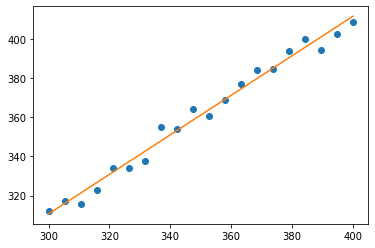

In [4]:
poly = np.polyfit(x,y,deg=1)
z = np.polyval(poly, x)
plt.plot(x, y, 'o')
plt.plot(x, z)
print(z)
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

x = [0,100,200,300,400]
y = [341.96,311.1,315.74,324.49,321.14]
type(x and y)

list

In [6]:
def calculateEquationParameters(x):
 
    '''
    代解未知数为a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3
    :param x:
    :return: parameter
    '''
    # parameter为二维数组，用来存放参数，sizeOfInterval是用来存放区间的个数
    parameter = []
    n = len(x)
    sizeOfInterval = n - 1  # 线段数
    i = 1
    # 首先输入方程两边相邻  节点  处函数值相等的方程为2(n-2)=4个方程; n个点要减去两个端点，然后乘以2
    while i <= n-2:
        # x[i]代入点i前一条线段的参数
        data = np.zeros(sizeOfInterval * 4)
        data[(i - 1) * 4] = x[i] * x[i] * x[i]
        data[(i - 1) * 4 + 1] = x[i] * x[i]
        data[(i - 1) * 4 + 2] = x[i]
        data[(i - 1) * 4 + 3] = 1
        # x[i]代入点i后一条线段的参数
        data1 = np.zeros(sizeOfInterval * 4)
        data1[i * 4] = x[i] * x[i] * x[i]
        data1[i * 4 + 1] = x[i] * x[i]
        data1[i * 4 + 2] = x[i]
        data1[i * 4 + 3] = 1
        parameter.append(data)
        parameter.append(data1)
        i += 1
    # 输入   端点   处的函数值。为2个方程
    data = np.zeros(sizeOfInterval * 4)
    # 第一条线段
    data[0] = x[0] * x[0] * x[0]
    data[1] = x[0] * x[0]
    data[2] = x[0]
    data[3] = 1
    parameter.append(data)
    data = np.zeros(sizeOfInterval * 4)
    # 最后一条线段
    data[-4] = x[-1] * x[-1] * x[-1]
    data[-3] = x[-1] * x[-1]
    data[-2] = x[-1]
    data[-1] = 1
    parameter.append(data)
 
    # 节点点函数一阶导数值相等为n-2=2个方程。
    i = 1
    while i <= n-2:
        data = np.zeros(sizeOfInterval * 4)
        data[(i - 1) * 4] = 3 * x[i] * x[i]
        data[(i - 1) * 4 + 1] = 2 * x[i]
        data[(i - 1) * 4 + 2] = 1
        data[i * 4] = -3 * x[i] * x[i]
        data[i * 4 + 1] = -2 * x[i]
        data[i * 4 + 2] = -1
        # temp = data[2:]
        # parameter.append(temp)
        parameter.append(data)
        i += 1
 
    # 节点函数二阶导数值相等为n-2=2个方程。且端点处的函数值的二阶导数为零，为2个方程。
    i = 1
    while i <= n-2:
        data = np.zeros(sizeOfInterval * 4)
        data[(i - 1) * 4] = 6 * x[i]
        data[(i - 1) * 4 + 1] = 2
        data[i * 4] = -6 * x[i]
        data[i * 4 + 1] = -2
        # temp = data[2:]
        # parameter.append(temp)
        parameter.append(data)
        i += 1
 
    # 总共2(n-1)-2=10个方程
    parameter = np.array(parameter)
    return parameter[:, 2:]  # 去掉前两个a1,b1
calculateEquationParameters

<function __main__.calculateEquationParameters(x)>

In [7]:

 
"""
功能：计算样条函数的系数。
参数：parametes为方程的系数，y为要插值函数的因变量。
返回值：三次插值函数的系数。
"""
 
 
def solutionOfEquation(parametes, y):
    n = len(x)
    sizeOfInterval = n - 1
    result = np.zeros(sizeOfInterval * 4 - 2)
    i = 1
    # 节点处方程右边
    while i < sizeOfInterval:  # result[0,1,2,3]
        result[(i - 1) * 2] = y[i]
        result[(i - 1) * 2 + 1] = y[i]
        i += 1
    # 起末端点处方程右边
    result[(sizeOfInterval - 1) * 2] = y[0]
    result[(sizeOfInterval - 1) * 2 + 1] = y[-1]
 
    a = np.array(parametes)
    b = np.array(result)
    return np.linalg.solve(a, b)  # 解线性方程组
 
solutionOfEquation

<function __main__.solutionOfEquation(parametes, y)>

In [8]:

"""
功能：根据所给参数，计算三次函数的函数值：
参数:parameters为二次函数的系数，x为自变量
返回值：为函数的因变量
"""
 
 
def calculate(paremeters, x):
    result = []
    for data_x in x:
        y = paremeters[0] * data_x * data_x * data_x + paremeters[1] * data_x * data_x + paremeters[2] * data_x + paremeters[3]
        result.append(y)
    return result
 
 
"""
功能：采点
参数：x
返回值：采取点和采取点的函数值
"""
 
 
def grasp_sample(x):
    n = len(x)
    i = 1
    # result 为求解出来后的a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3
    result = [0, 0]
    temp = solutionOfEquation(calculateEquationParameters(x), y)
    result.extend(temp)
    samples_x = []
    samples_y = []
    # n-1段曲线
    while i < n:
        sample_x = np.arange(x[i-1], x[i], 0.01)
        sample_y = calculate(result[(i-1)*4:i*4], sample_x)
        samples_x.extend(sample_x)
        samples_y.extend(sample_y)
        i = i+1
    samples_x.append(x[n-1])
    samples_y.extend(calculate(result[-4:], [x[n-1]]))
    return [samples_x, samples_y]
calculate

<function __main__.calculate(paremeters, x)>

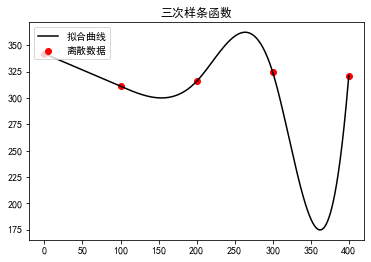

<function __main__.Draw(data_x, data_y, new_data_x, new_data_y)>

In [9]:
"""
功能：将函数绘制成图像
参数：data_x,data_y为离散的点.new_data_x,new_data_y为由拉格朗日插值函数计算的值。x为函数的预测值。
返回值：空
"""
def Draw(data_x, data_y, new_data_x, new_data_y):
    plt.plot(new_data_x, new_data_y, label="拟合曲线", color="black")
    plt.scatter(data_x, data_y, label="离散数据", color="red")
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.title("三次样条函数")
    plt.legend(loc="upper left")
    plt.show()

samples = grasp_sample(x)
# print(samples[0])
# print(samples[1])
Draw(x, y, samples[0], samples[1])
Draw

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def Fun(x,a1,a2,a3):                   # 定义拟合函数形式
    return a1*x**2+a2*x+a3
def error (p,x,y): # 拟合残差
 return Fun(p,x)-y
def main():
    x = np.linspace(-10,10,100)       # 创建时间序列
    a1,a2,a3 = [-2,5,10]              # 原始数据的参数
    noise = np.random.randn(len(x))   # 创建随机噪声
    y = Fun(x,a1,a2,a3)+noise*2       # 加上噪声的序列
    para,pcov=curve_fit(Fun,x,y)
    y_fitted = Fun(x,para[0],para[1],para[2]) # 画出拟合后的曲线
 
    plt.figure(figsize=(10,10))
    plt.plot(x,y,'o', label = 'Original curve')
    plt.plot(x,y_fitted,'-r', label ='Fitted curve')
    plt.legend()
    plt.show()
    print (para)
curve_fit

<function scipy.optimize.minpack.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)>

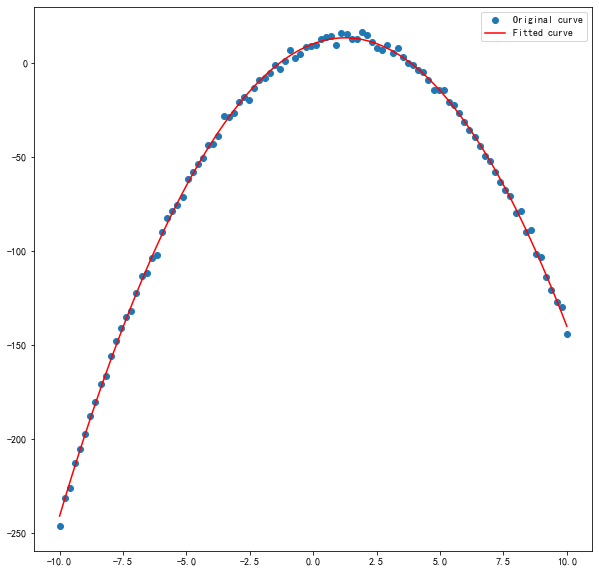

[-2.00792391  5.05307131 10.33830578]


In [11]:
if __name__=='__main__':
   main()

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def Fun(x,a1,a2):                   # 定义拟合函数形式
    return a1*x**2+a2*x
def error (p,x,y): # 拟合残差
 return Fun(p,x)-y
def main():
    x = np.linspace(-10,10,100)       # 创建时间序列
    a1,a2,a3 = [-2,5,10]              # 原始数据的参数
#     noise = np.random.randn(len(x))   # 创建随机噪声
    y = Fun(x,a1,a2)      
    para,pcov=curve_fit(Fun,x,y)
    y_fitted = Fun(x,para[0],para[1]) # 画出拟合后的曲线
 
    plt.figure(figsize=(6,6))
    plt.plot(x,y,'o', label = 'Original curve')
    plt.plot(x,y_fitted,'-r', label ='Fitted curve')
    plt.legend()
    plt.show()
    print (para)
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\lll51\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

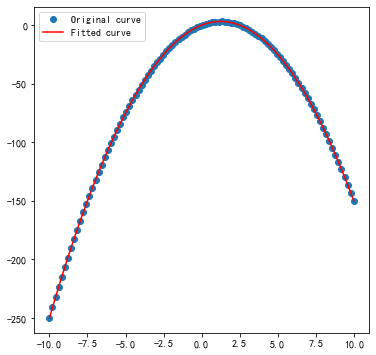

[-2.  5.]


In [13]:
if __name__=='__main__':
   main()

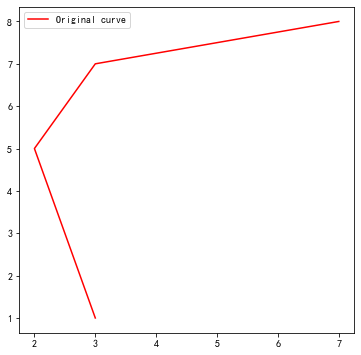

<function matplotlib.pyplot.show(close=None, block=None)>

In [14]:
o=[3,2,3,7]
v=[1,5,7,8]
plt.figure(figsize=(6,6))
plt.plot(o,v,'r', label = 'Original curve')
plt.legend()
plt.show()
plt.show